Trenowanie modelu z uzyciem autogluona

In [ ]:
# AutoGluon: trening modelu regresyjnego na Listening_Time_minutes
from autogluon.tabular import TabularPredictor
import pandas as pd

train_data = pd.read_csv('data/train_cleaned.csv')
# test_data = pd.read_csv('data/test.csv')

train_data = train_data.drop(columns=['id']) #wywalamy id

label = 'Listening_Time_minutes'
predictor = TabularPredictor(
    label="Listening_Time_minutes",
    eval_metric="rmse"
).fit(
    train_data,
    presets="best_quality",
    verbosity=2
)


# Leaderboard na testowym zbiorze
leaderboard = predictor.leaderboard(train_data, silent=True)
print(leaderboard)

#score: 15.02615 (stac mnie na wiecej imo)

No path specified. Models will be saved in: "AutogluonModels\ag-20251019_145809"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.4.0
Python Version:     3.10.11
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
CPU Count:          6
Memory Avail:       1.75 GB / 15.92 GB (11.0%)
Disk Space Avail:   28.67 GB / 237.20 GB (12.1%)
Presets specified: ['best_quality']
Using hyperparameters preset: hyperparameters='zeroshot'
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of A

                    model  score_test  score_val              eval_metric  \
0  RandomForestMSE_BAG_L2   -9.452237 -12.740779  root_mean_squared_error   
1         LightGBM_BAG_L2   -9.532354 -12.694412  root_mean_squared_error   
2     WeightedEnsemble_L3   -9.533320 -12.683784  root_mean_squared_error   
3       LightGBMXT_BAG_L2   -9.694200 -12.727411  root_mean_squared_error   
4     WeightedEnsemble_L2   -9.993930 -12.719372  root_mean_squared_error   
5  RandomForestMSE_BAG_L1  -10.085467 -12.845833  root_mean_squared_error   
6         LightGBM_BAG_L1  -10.171205 -12.904098  root_mean_squared_error   
7       LightGBMXT_BAG_L1  -11.763539 -13.039497  root_mean_squared_error   
8         CatBoost_BAG_L2  -12.022886 -13.835705  root_mean_squared_error   
9         CatBoost_BAG_L1  -25.698346 -25.716935  root_mean_squared_error   

   pred_time_test  pred_time_val     fit_time  pred_time_test_marginal  \
0     1571.660060    2387.005405  2130.802481                 9.260957   
1   

In [17]:
# === AutoGluon: użycie najlepszego modelu WeightedEnsemble_L3 ===

from autogluon.tabular import TabularPredictor
import pandas as pd

predictor = TabularPredictor.load('AutogluonModels/ag-20251019_145809')

test_data = pd.read_csv('data/test.csv')

predictions = predictor.predict(test_data, model='WeightedEnsemble_L3')

test_data['Predicted_Listening_Time_minutes'] = predictions
test_data.to_csv('data/test_with_predictions.csv', index=False)

test_data.head()


,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Predicted_Listening_Time_minutes
0,750000,Educational Nuggets,Episode 73,78.96,Education,38.11,Saturday,Evening,53.33,1.0,Neutral,54.014927
1,750001,Sound Waves,Episode 23,27.87,Music,71.29,Sunday,Morning,NaN,0.0,Neutral,17.831820
2,750002,Joke Junction,Episode 11,69.10,Comedy,67.89,Friday,Evening,97.51,0.0,Positive,47.128044
3,750003,Comedy Corner,Episode 73,115.39,Comedy,23.40,Sunday,Morning,51.75,2.0,Positive,78.446968
4,750004,Life Lessons,Episode 50,72.32,Lifestyle,58.10,Wednesday,Morning,11.30,2.0,Neutral,46.424461


In [18]:
#zapisanie tylko potrzebmnych danych do csv

import pandas as pd

# Wczytaj plik
df = pd.read_csv('data/test_with_predictions.csv')

# Zostaw tylko kolumny 'id' i 'Predicted_Listening_Time_minutes'
df_result = df[['id', 'Predicted_Listening_Time_minutes']].copy()

# Zmień nazwę kolumny na 'Listening_Time_minutes'
df_result.rename(columns={'Predicted_Listening_Time_minutes': 'Listening_Time_minutes'}, inplace=True)

# Zapisz wynik do nowego pliku
df_result.to_csv('data/submission-WeightedEnsemble_L3.csv', index=False)

# Podgląd wyniku
df_result.head()


,id,Listening_Time_minutes
0,750000,54.014927
1,750001,17.831820
2,750002,47.128044
3,750003,78.446970
4,750004,46.424460


In [14]:
#jakich modeli uzywa?

from autogluon.tabular import TabularPredictor

predictor = TabularPredictor.load("AutogluonModels/ag-20251019_145809")

# Wyświetl leaderboard, który pokazuje wszystkie modele
leaderboard = predictor.leaderboard(silent=True)
print(leaderboard[["model", "score_val", "fit_time", "pred_time_val"]].sort_values("score_val"))


                    model  score_val     fit_time  pred_time_val
9         CatBoost_BAG_L1 -25.716935    11.110373       0.166015
8         CatBoost_BAG_L2 -13.835705  1620.365879    2358.601126
7       LightGBMXT_BAG_L1 -13.039497   577.917188     822.118027
6         LightGBM_BAG_L1 -12.904098   840.381827    1528.322788
5  RandomForestMSE_BAG_L1 -12.845833    96.931990       7.872287
4  RandomForestMSE_BAG_L2 -12.740779  2130.802481    2387.005405
3       LightGBMXT_BAG_L2 -12.727411  1595.001969    2380.747805
2     WeightedEnsemble_L2 -12.719372   938.183841    1536.208076
1         LightGBM_BAG_L2 -12.694412  1555.443357    2364.154502
0     WeightedEnsemble_L3 -12.683784  2230.565824    2414.964502


In [1]:
#agresywniejsze podejście na razie bez uzycia karty graficznej

from autogluon.tabular import TabularPredictor
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler


# Wczytanie danych
train_data = pd.read_csv('data/train_cleaned.csv')
test_data = pd.read_csv('data/test.csv')


# Feature engineering
for df in [train_data, test_data]:
    df['Episode_Length_log'] = np.log1p(df['Episode_Length_minutes'])
    df['Host_Guest_Popularity_sum'] = df['Host_Popularity_percentage'] + df['Guest_Popularity_percentage'].fillna(0)
    df['Ads_per_minute'] = df['Number_of_Ads'] / (df['Episode_Length_minutes'] + 1)
    df['Publication_Day_num'] = df['Publication_Day'].map({
        'Monday':0,'Tuesday':1,'Wednesday':2,'Thursday':3,
        'Friday':4,'Saturday':5,'Sunday':6})
    df['Publication_Time_num'] = df['Publication_Time'].map({
        'Morning':0,'Afternoon':1,'Evening':2,'Night':3})


# Target encoding
for col in ['Podcast_Name','Genre','Episode_Sentiment']:
    means = train_data.groupby(col)['Listening_Time_minutes'].mean()
    train_data[col + '_target_enc'] = train_data[col].map(means)
    test_data[col + '_target_enc'] = test_data[col].map(means)


# Skalowanie dla LR
num_cols = ['Episode_Length_minutes','Host_Popularity_percentage','Guest_Popularity_percentage',
            'Number_of_Ads','Episode_Length_log','Host_Guest_Popularity_sum','Ads_per_minute']
scaler = StandardScaler()
train_data[num_cols] = scaler.fit_transform(train_data[num_cols])
test_data[num_cols] = scaler.transform(test_data[num_cols])


# Ustawienia modelu
label = 'Listening_Time_minutes'
hyperparameters = {
    'GBM': {},
    'CAT': {},
    'XGB': {'tree_method':'hist'},
    'LR': {}
}


predictor = TabularPredictor(label=label, eval_metric='rmse').fit(
    train_data,
    presets='medium_quality',   # szybszy tryb
    hyperparameter_tune_kwargs='auto',
    hyperparameters=hyperparameters,
    num_bag_folds=0,            # minimalny bagging
    num_stack_levels=0,         # minimalny stacking
    verbosity=2
)


# Predykcja na teście
preds = predictor.predict(test_data)
test_data['Listening_Time_predicted'] = preds
test_data[['id','Listening_Time_predicted']].to_csv('data/predictions_cpu.csv', index=False)
print("Predykcje CPU zapisane w 'predictions_cpu.csv'.")

/home/jbiedrzy/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
No path specified. Models will be saved in: "AutogluonModels/ag-20251020_081915"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.4.0
Python Version:     3.10.13
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #32~20.04.1-Ubuntu SMP Mon Jan 9 18:02:08 UTC 2023
CPU Count:          4
Memory Avail:       9.63 GB / 15.44 GB (62.4%)
Disk Space Avail:   90.58 GB / 131.62 GB (68.8%)
Presets specified: ['medium_quality']
	Consider setting `time_limit` to ensure training finishes within an expected duration or experiment with a small portion of `train_data` to identify an ideal `presets` and `hyperparameters` configuration.
Beginning AutoGluon training ...
AutoGl

[1000]	valid_set's rmse: 13.1479
[2000]	valid_set's rmse: 13.1026


  0%|          | 0/1 [01:10<?, ?it/s]


KeyboardInterrupt: 

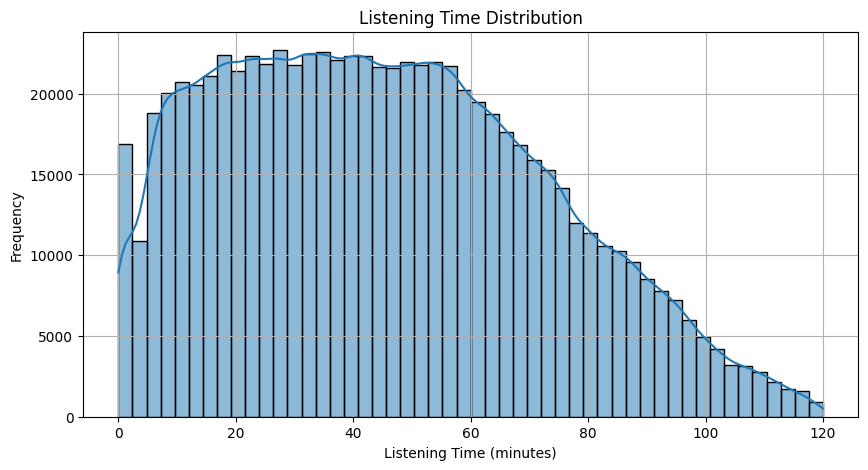

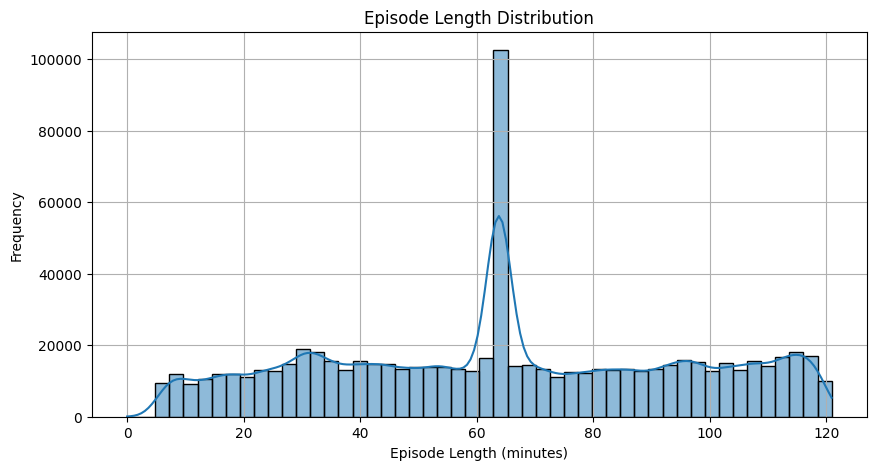

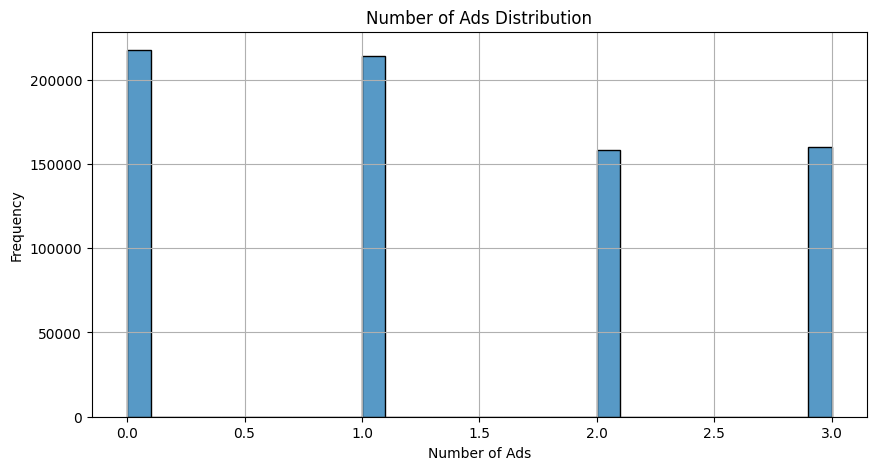

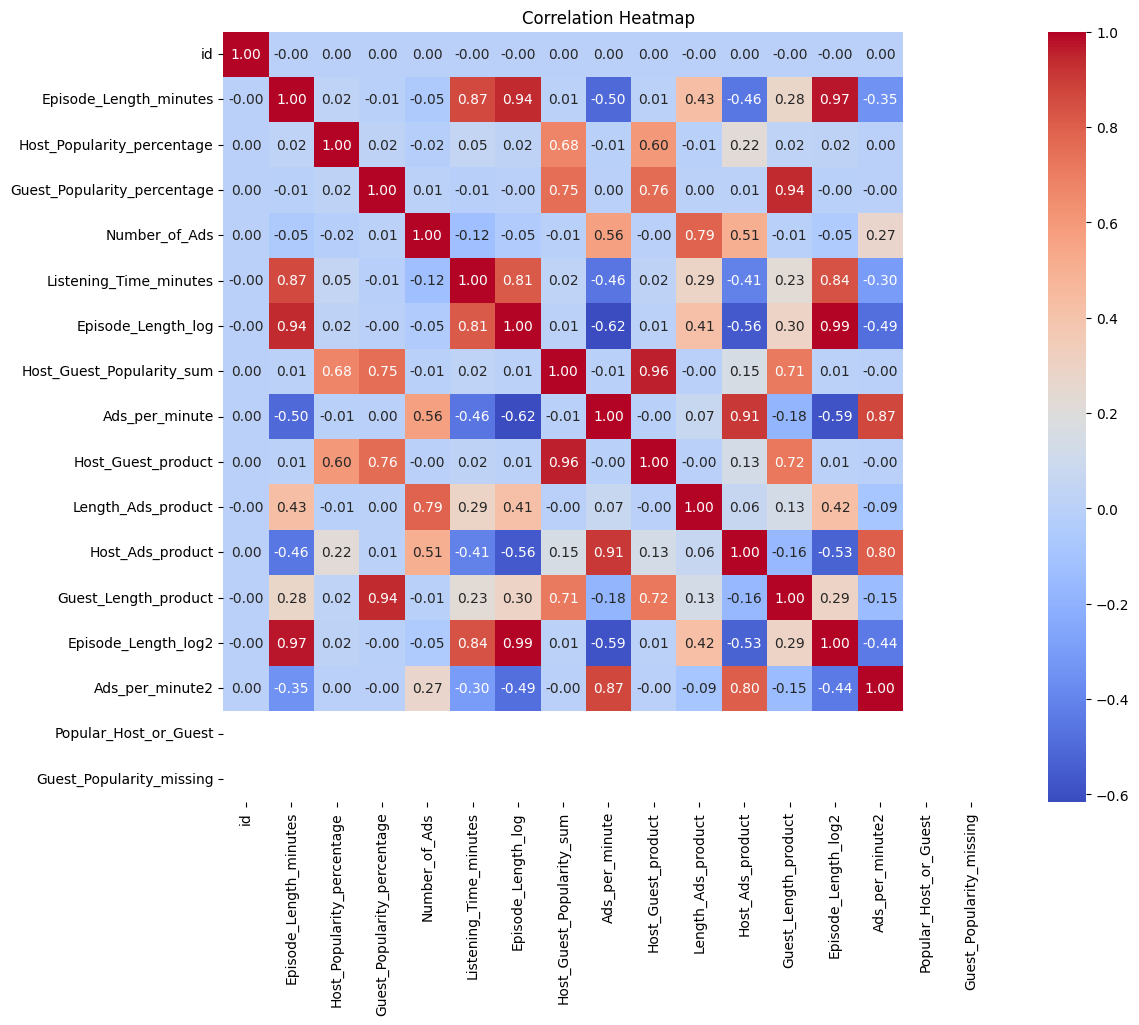

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Wczytanie danych
train_data = pd.read_csv('data/train_cleaned.csv')

# Feature engineering (jak w modelu)
train_data['Episode_Length_log'] = np.log1p(train_data['Episode_Length_minutes'])
train_data['Host_Guest_Popularity_sum'] = train_data['Host_Popularity_percentage'] + train_data['Guest_Popularity_percentage'].fillna(0)
train_data['Ads_per_minute'] = train_data['Number_of_Ads'] / (train_data['Episode_Length_minutes'] + 1)
train_data['Host_Guest_product'] = train_data['Host_Popularity_percentage'] * train_data['Guest_Popularity_percentage'].fillna(0)
train_data['Length_Ads_product'] = train_data['Episode_Length_minutes'] * train_data['Number_of_Ads']
train_data['Host_Ads_product'] = train_data['Host_Popularity_percentage'] * train_data['Ads_per_minute']
train_data['Guest_Length_product'] = train_data['Guest_Popularity_percentage'].fillna(0) * train_data['Episode_Length_log']
train_data['Episode_Length_log2'] = train_data['Episode_Length_log'] ** 2
train_data['Ads_per_minute2'] = train_data['Ads_per_minute'] ** 2
train_data['Popular_Host_or_Guest'] = ((train_data['Host_Popularity_percentage'] > 0.8) |
                                       (train_data['Guest_Popularity_percentage'].fillna(0) > 0.8)).astype(int)
train_data['Guest_Popularity_missing'] = train_data['Guest_Popularity_percentage'].isna().astype(int)

# Histogram Listening_Time_minutes
plt.figure(figsize=(10, 5))
sns.histplot(train_data['Listening_Time_minutes'], bins=50, kde=True)
plt.title('Listening Time Distribution')
plt.xlabel('Listening Time (minutes)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Histogram Episode_Length_minutes
plt.figure(figsize=(10, 5))
sns.histplot(train_data['Episode_Length_minutes'], bins=50, kde=True)
plt.title('Episode Length Distribution')
plt.xlabel('Episode Length (minutes)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Histogram Number_of_Ads
plt.figure(figsize=(10, 5))
sns.histplot(train_data['Number_of_Ads'], bins=30)
plt.title('Number of Ads Distribution')
plt.xlabel('Number of Ads')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Heatmap korelacji
plt.figure(figsize=(14, 10))
corr = train_data.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
#jeszcze bardziej agresywnie z feature engineeringiem i tuningiem

from autogluon.tabular import TabularPredictor
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Wczytanie danych
train_data = pd.read_csv('data/train_cleaned.csv')
test_data = pd.read_csv('data/test.csv')

# Transformacja celu
train_data['Listening_Time_minutes_log'] = np.log1p(train_data['Listening_Time_minutes'])

# Feature engineering
for df in [train_data, test_data]:
    df['Episode_Length_log'] = np.log1p(df['Episode_Length_minutes'])
    df['Host_Guest_Popularity_sum'] = df['Host_Popularity_percentage'] + df['Guest_Popularity_percentage'].fillna(0)
    df['Ads_per_minute'] = df['Number_of_Ads'] / (df['Episode_Length_minutes'] + 1)

    df['Publication_Day_num'] = df['Publication_Day'].map({
        'Monday':0,'Tuesday':1,'Wednesday':2,'Thursday':3,
        'Friday':4,'Saturday':5,'Sunday':6})
    df['Publication_Time_num'] = df['Publication_Time'].map({
        'Morning':0,'Afternoon':1,'Evening':2,'Night':3})

    df['Host_Guest_product'] = df['Host_Popularity_percentage'] * df['Guest_Popularity_percentage'].fillna(0)
    df['Length_Ads_product'] = df['Episode_Length_minutes'] * df['Number_of_Ads']
    df['Host_Ads_product'] = df['Host_Popularity_percentage'] * df['Ads_per_minute']
    df['Guest_Length_product'] = df['Guest_Popularity_percentage'].fillna(0) * df['Episode_Length_log']

    df['Episode_Length_log2'] = df['Episode_Length_log'] ** 2
    df['Ads_per_minute2'] = df['Ads_per_minute'] ** 2

    df['Popular_Host_or_Guest'] = ((df['Host_Popularity_percentage'] > 0.8) |
                                   (df['Guest_Popularity_percentage'].fillna(0) > 0.8)).astype(int)

    df['Guest_Popularity_missing'] = df['Guest_Popularity_percentage'].isna().astype(int)

# Target encoding ze smoothingiem
def smooth_target_encoding(df, col, target, alpha=10):
    means = df.groupby(col)[target].mean()
    counts = df.groupby(col)[target].count()
    global_mean = df[target].mean()
    smooth = (means * counts + global_mean * alpha) / (counts + alpha)
    return df[col].map(smooth)

for col in ['Podcast_Name','Genre','Episode_Sentiment']:
    train_data[col + '_target_enc'] = smooth_target_encoding(train_data, col, 'Listening_Time_minutes_log', alpha=10)
    test_data[col + '_target_enc'] = smooth_target_encoding(train_data, col, 'Listening_Time_minutes_log', alpha=10)

# Skalowanie tylko dla LR
num_cols = [
    'Episode_Length_minutes','Host_Popularity_percentage','Guest_Popularity_percentage',
    'Number_of_Ads','Episode_Length_log','Host_Guest_Popularity_sum','Ads_per_minute',
    'Host_Guest_product','Length_Ads_product','Episode_Length_log2','Ads_per_minute2',
    'Host_Ads_product','Guest_Length_product'
]
train_data_scaled = train_data.copy()
test_data_scaled = test_data.copy()

scaler = StandardScaler()
train_data_scaled[num_cols] = scaler.fit_transform(train_data_scaled[num_cols])
test_data_scaled[num_cols] = scaler.transform(test_data_scaled[num_cols])

# Ustawienia modelu
label = 'Listening_Time_minutes_log'
hyperparameters = {
    'GBM': {'num_boost_round': 1000},
    'CAT': {'iterations': 1000, 'depth': 6},
    'XGB': {'tree_method':'hist', 'n_estimators':1000},
    'RF': {},
    'LR': {},
    'NN_TORCH': {'num_epochs': 100}
}

predictor = TabularPredictor(label=label, eval_metric='rmse').fit(
    train_data=train_data_scaled,
    presets='best_quality',
    hyperparameter_tune_kwargs={'num_trials':50},
    hyperparameters=hyperparameters,
    num_bag_folds=5,
    num_stack_levels=1,
    verbosity=3,
    drop_columns = ['id']
)

# Predykcja na teście
preds_log = predictor.predict(test_data_scaled)
preds = np.expm1(preds_log)
test_data['Listening_Time_predicted'] = preds
test_data[['id','Listening_Time_predicted']].to_csv('data/predictions_cpu_2.0.csv', index=False)
print("Predykcje CPU zapisane w 'predictions_cpu_2.0.csv'.")

# Ewaluacja RMSE jeśli test zawiera etykiety
if 'Listening_Time_minutes' in test_data.columns:
    rmse = mean_squared_error(test_data['Listening_Time_minutes'], preds, squared=False)
    print(f"RMSE na zbiorze testowym: {rmse:.4f}")

/home/jbiedrzy/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
No path specified. Models will be saved in: "AutogluonModels/ag-20251020_075509"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.4.0
Python Version:     3.10.13
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #32~20.04.1-Ubuntu SMP Mon Jan 9 18:02:08 UTC 2023
CPU Count:          4
Memory Avail:       12.01 GB / 15.44 GB (77.7%)
Disk Space Avail:   90.92 GB / 131.62 GB (69.1%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=5, num_bag_sets=1
DyStack is enabled 

KeyboardInterrupt: 

In [ ]:
# trenowanie wymagające karty graficznej

from autogluon.tabular import TabularPredictor
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

train_data = pd.read_csv('data/train_cleaned.csv')
test_data = pd.read_csv('data/test.csv')

# Feature engineering
for df in [train_data, test_data]:
    df['Episode_Length_log'] = np.log1p(df['Episode_Length_minutes'])
    df['Host_Guest_Popularity_sum'] = df['Host_Popularity_percentage'] + df['Guest_Popularity_percentage'].fillna(0)
    df['Ads_per_minute'] = df['Number_of_Ads'] / (df['Episode_Length_minutes'] + 1)
    df['Publication_Day_num'] = df['Publication_Day'].map({
        'Monday':0,'Tuesday':1,'Wednesday':2,'Thursday':3,
        'Friday':4,'Saturday':5,'Sunday':6})
    df['Publication_Time_num'] = df['Publication_Time'].map({
        'Morning':0,'Afternoon':1,'Evening':2,'Night':3})

# Target encoding
for col in ['Podcast_Name','Genre','Episode_Sentiment']:
    means = train_data.groupby(col)['Listening_Time_minutes'].mean()
    train_data[col + '_target_enc'] = train_data[col].map(means)
    test_data[col + '_target_enc'] = test_data[col].map(means)

# Skalowanie dla LR
num_cols = ['Episode_Length_minutes','Host_Popularity_percentage','Guest_Popularity_percentage',
            'Number_of_Ads','Episode_Length_log','Host_Guest_Popularity_sum','Ads_per_minute']
scaler = StandardScaler()
train_data[num_cols] = scaler.fit_transform(train_data[num_cols])
test_data[num_cols] = scaler.transform(test_data[num_cols])

# Hyperparameters z GPU
hyperparameters = {
    'GBM': {'ag_args_fit': {'use_gpu': True}, 'extra_trees': True},
    'XGB': {'tree_method':'gpu_hist'},
    'CAT': {'task_type':'GPU'},
    'RF': {}, 'XT': {},
    'NN_TORCH': {}, 'FASTAI': {}, 'LR': {}
}

label = 'Listening_Time_minutes'
predictor = TabularPredictor(label=label, eval_metric='rmse').fit(
    train_data,
    presets='best_quality',
    hyperparameter_tune_kwargs='auto',
    hyperparameters=hyperparameters,
    num_bag_folds=5,
    num_stack_levels=2,
    verbosity=2
)

# Predykcja na teście
preds = predictor.predict(test_data)
test_data['Listening_Time_predicted'] = preds
test_data[['id','Listening_Time_predicted']].to_csv('predictions_gpu.csv', index=False)
print("Predykcje GPU zapisane w 'predictions_gpu.csv'.")


In [5]:
#prosty model regresyjny z użyciem LightGBM

import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Wczytanie danych
train_df = pd.read_csv('data/train_cleaned.csv')
test_df = pd.read_csv('data/test.csv')

# Transformacja celu
train_df['target'] = np.log1p(train_df['Listening_Time_minutes'])

# Prosty feature engineering (opcjonalnie rozszerz)
features = [
    'Episode_Length_minutes',
    'Host_Popularity_percentage',
    'Guest_Popularity_percentage',
    'Number_of_Ads'
]

# Obsługa braków danych
train_df[features] = train_df[features].fillna(0)
test_df[features] = test_df[features].fillna(0)

# Podział na zbiór walidacyjny
X_train, X_val, y_train, y_val = train_test_split(
    train_df[features], train_df['target'], test_size=0.2, random_state=42
)

# Konfiguracja modelu
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'verbosity': -1,
    'boosting_type': 'gbdt',
    'learning_rate': 0.05,
    'num_leaves': 31
}

train_data = lgb.Dataset(X_train, label=y_train)
val_data = lgb.Dataset(X_val, label=y_val, reference=train_data)

# Trenowanie
model = lgb.train(
    params,
    train_data,
    valid_sets=[train_data, val_data],
    num_boost_round=1000
)

# Predykcja
preds_log = model.predict(test_df[features])
preds = np.expm1(preds_log)

# Zapis predykcji
test_df['Listening_Time_predicted'] = preds
test_df[['id', 'Listening_Time_predicted']].to_csv('data/predictions_lgbm.csv', index=False)

# Ewaluacja (jeśli dostępne etykiety)
if 'Listening_Time_minutes' in test_df.columns:
    rmse = mean_squared_error(test_df['Listening_Time_minutes'], preds, squared=False)
    print(f"RMSE: {rmse:.4f}")